# First-order system with proportional control
Consider the simple feedback loop shown below

![Simple feedback loop](../../assets/simple_feedback.png)

with $G_c=K_c$ and $G_p=\frac{1}{\tau s + 1}$

In [1]:
%matplotlib inline

In [2]:
import sympy
sympy.init_printing()

In [3]:
G_c = K_C = sympy.Symbol('K_C', positive=True)

In [4]:
s = sympy.Symbol('s')
tau = sympy.Symbol('tau', positive=True)

In [5]:
G_p = 1/(tau*s + 1)
G_p

In [6]:
G_OL = G_p*G_c

In [7]:
from tbcontrol.loops import feedback

The target is to get $y_{SP} = y$

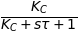

In [8]:
G_CL = feedback(G_OL, 1).cancel()
G_CL

In [9]:
t = sympy.Symbol('t', positive=True)

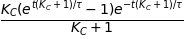

In [10]:
general_timeresponse = sympy.inverse_laplace_transform(sympy.simplify(G_CL/s), s, t)
general_timeresponse

In [11]:
import numpy

In [12]:
import matplotlib.pyplot as plt

In [13]:
y_func = sympy.lambdify((K_C, tau, t), general_timeresponse, 'numpy')

In [14]:
smootht = numpy.linspace(0, 5)

In [15]:
def response(K_C=10, tau=10):
    y = y_func(K_C, tau, smootht)
    e = 1 - y
    fig, [ax_y, ax_e] = plt.subplots(2, 1)
    ax_y.plot(smootht, y)
    ax_y.axhline(1)
    ax_y.set_ylabel('Setpoint and y')

    ax_e.plot(smootht, e)
    ax_e.set_ylabel('Error')

In [16]:
from ipywidgets import interact

In [17]:
interact(response, K_C=(0, 100), tau=(0, 20))

interactive(children=(IntSlider(value=10, description='K_C'), IntSlider(value=10, description='tau', max=20), …

<function __main__.response(K_C=10, tau=10)>

## Offset as function of gain

In [18]:
r = 1/s

In [19]:
y = r*G_CL

In [20]:
e = r - y

Use the final value statement to obtain eventual offset:

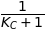

In [21]:
steady_offset = sympy.limit(s*e, s, 0)
steady_offset

Note the steady state offset is not a function of the system dynamics (time constant).

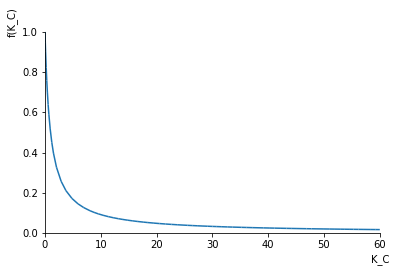

In [22]:
sympy.plot(steady_offset, (K_C, 0, 60))

Second order system with proportional control
---------------------------------------------

In [23]:
import matplotlib.pyplot as plt

In [24]:
zeta = sympy.Symbol('zeta')

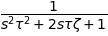

In [25]:
G = 1/(tau**2*s**2 + 2*tau*zeta*s + 1)
G

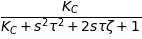

In [26]:
G_CL = feedback(G*K_C, 1).cancel()
G_CL

In [27]:
def response(new_K_C, new_tau, new_zeta):
    real_CL = G_CL.subs({K_C: new_K_C, tau: new_tau, zeta: new_zeta})
    timeresponse = sympy.inverse_laplace_transform(sympy.simplify(real_CL/s), s, t)
    sympy.plot(timeresponse, 1, (t, 0, 100))
    poles = sympy.solve(sympy.denom(sympy.simplify(real_CL)), s)
    plt.plot([sympy.re(p) for p in poles], [sympy.im(p) for p in poles], 'x', markersize=10)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.axis([-1, 1, -1, 1])

In [28]:
interact(response, new_K_C=(0., 100), new_tau=(0, 10.), new_zeta=(0, 2.));

interactive(children=(FloatSlider(value=50.0, description='new_K_C'), FloatSlider(value=5.0, description='new_…